# Pytorch Step by Step: Linear Regression

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable

## Building a toy Linear Regression Model

In [2]:
# let's build a toy dataset
x_values = list(range(11))

# we always want 2D datasets so we perform a reshape
x_train = np.array(x_values, dtype=np.float32).reshape(-1,1)
x_train.shape


# here we will implement a y=2x + 1 model

y_values = [2*i +1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32).reshape(-1,1)
y_train.shape

(11, 1)

### Building a Model

In [3]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self,x):
        out = self.linear(x)
        return out

In [4]:
input_dim  = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

### Instantiate a Loss Class

In [5]:
# We will use an MSE Loss for linear regression
criterion  = nn.MSELoss()

### Instantiate an Optimizer Class

In [6]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Train a Model

In [7]:
epochs = 100

for epoch in range(epochs):
    epoch += 1
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients with respect to parameters
    optimizer.zero_grad()
    
    # Forward Step to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    print("epoch {} loss {}".format(epoch, loss.data[0]))

epoch 1 loss 98.630126953125
epoch 2 loss 8.096068382263184
epoch 3 loss 0.7109226584434509
epoch 4 loss 0.10797436535358429
epoch 5 loss 0.05823582038283348
epoch 6 loss 0.053626954555511475
epoch 7 loss 0.05270521715283394
epoch 8 loss 0.05209026113152504
epoch 9 loss 0.0515064001083374
epoch 10 loss 0.050931014120578766
epoch 11 loss 0.05036238580942154
epoch 12 loss 0.049799855798482895
epoch 13 loss 0.04924386367201805
epoch 14 loss 0.04869403690099716
epoch 15 loss 0.04815009608864784
epoch 16 loss 0.04761243239045143
epoch 17 loss 0.047080863267183304
epoch 18 loss 0.046555113047361374
epoch 19 loss 0.046035196632146835
epoch 20 loss 0.045521080493927
epoch 21 loss 0.04501284658908844
epoch 22 loss 0.04451017081737518
epoch 23 loss 0.04401317611336708
epoch 24 loss 0.0435217060148716
epoch 25 loss 0.04303562268614769
epoch 26 loss 0.04255496338009834
epoch 27 loss 0.042079780250787735
epoch 28 loss 0.04161004722118378
epoch 29 loss 0.04114529490470886
epoch 30 loss 0.04068582504

In [8]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.74672765],
       [ 2.7832012 ],
       [ 4.8196745 ],
       [ 6.8561482 ],
       [ 8.892622  ],
       [10.929095  ],
       [12.9655695 ],
       [15.002043  ],
       [17.038515  ],
       [19.07499   ],
       [21.111462  ]], dtype=float32)

In [9]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

### Plot results

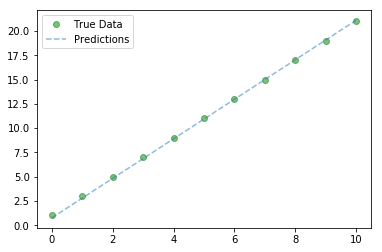

In [12]:
plt.clf()

predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

plt.plot(x_train, y_train, 'go', label="True Data", alpha = 0.5)

plt.plot(x_train, predicted, '--', label="Predictions", alpha = 0.5)

# Legend and plot
plt.legend(loc="best")
plt.show()

### Save a Model

In [13]:
save_model = False

if save_model is True:
    torch.save(model.state_dict(), "regression_model.pk1")

    

### Load a Model

In [14]:
load_model = False

if load_model is True:
    model.load_state_dict(torch.load("regression_model.pk1"))

### What about GPU?

It's very easy, we just need to set two things:
    - model
    - Variables

In [16]:
# we can just add after model = LinearRegressionModel(input_dim, output_dim)

# now the model is on GPU
if torch.cuda.is_available():
    model.cuda()
    
# ...

# to put the variables on GPU we do in the Training model loop
if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(x_train).cuda())
    labels = Variable(torch.from_numpy(y_train).cuda())
else:
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
# now also our variables are in GPU

## Recap

In order to build  a regression model we do the following steps:
    - Step 1: Create a Model Class
    - Step 2: Instantiate the Model Class
    - Step 3: Instantiate the Loss Class
    - Step 4: Instantiate the Optimizer Class
    - Step 5: Train the Model

If we want to use the GPU what we do is to pass the following things to GPU:
    - model (with model_name.cuda())
    - Variables (with vairbale_name.cuda())